In [24]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
from numpy import pi, arange, ceil, floor, zeros, array, uint8, int8, sin, split, uint16, arange, vstack, set_printoptions, \
inf, vectorize, hstack, random, sqrt, pi, exp, dtype, float64, add, sin, cos, linspace, sinc, dot
from pylab import binary_repr, digitize, empty
from scipy.io import wavfile
from scipy import signal

import matplotlib.pyplot as plt
import plotly.plotly 
import plotly.graph_objs
import timeit

set_printoptions(threshold=inf)

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout

print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)


2.2.1


In [2]:
IFrame("myJupyterFiles/trab_cps_3.pdf", width=985, height=1200)

In [40]:
%%time
%matplotlib inline
    
def decodingPCM(R, CodeWord, VTable, SamplesTaken, type="Uniform"):    
    #==========================================================================
    # IntTable: all the values back to int
    #==========================================================================    
    IntTable=[]
    CodeWord = split(CodeWord, SamplesTaken)
    decimal = 0
    for binaryGroup in CodeWord:
        for binary in binaryGroup:
            decimal = decimal * 2 + int(str(binary))
        IntTable.append(decimal)
        decimal = 0
        
    return hstack(Result)

    #==========================================================================
    #  Binary Code Table as Numpy Array
    # ==========================================================================     
    OriginalMessage = VTable[IntTable]
    
    return OriginalMessage


def encodingPCM(R, IndexTable, type="Uniform"):

    #======================================================================
    # StringTable: maps in 3 bits all the values in IndexTable, and lists
    #======================================================================
    StringTable = list(map(lambda x: binary_repr(x, R), IndexTable))  
    
    #==========================================================================
    # CharTable: maps in 1 bits all the values in StringTable, and then lists
    #==========================================================================
    CodingTable = array(zeros(len(StringTable)*R))
    index = 0
    for code in StringTable:
        for bit in code:
            CodingTable[index] = bit
            index += 1
    CodingTable = CodingTable.astype(uint16)   
    
    #==========================================================================
    # Table of Indexes: IndexTable as Figure
    #==========================================================================  
    #print("Table of Indexes Used In Sample")
    #print(vstack(IndexTable))
    #print("\n")
    
    #==========================================================================
    # Table of Code: IndexTable as Binary
    #==========================================================================  
    #print("Table of Indexes As Binary")
    #print(vstack(StringTable))
    #print("\n")

    #matplotlib.pyplot.figure(figsize=(15,10))
    #matplotlib.pyplot.title("IndexTable")
    #matplotlib.pyplot.xlabel("Time (Sampled Signal Index)")
    #matplotlib.pyplot.ylabel("Vmax (Amplitude)")
    #matplotlib.pyplot.xticks(arange(len(IndexTable)), StringTable[:])
    #matplotlib.pyplot.grid()
    #matplotlib.pyplot.stem(IndexTable, linefmt='r:', markerfmt='rs', basefmt='_')
    #matplotlib.pyplot.show()
    #print("\n")
    
    #print(CodingTable)
    return CodingTable


def quantization(R, Vmax, sampledSignal, SamplesTaken, quantifier="Midrise"):
    
    L = 2**R 
    q = 2*Vmax/L 
    
    if(quantifier=="Midtread"):
        VTable = arange(-Vmax +q, Vmax +q, q)[::]
        #DecisionValues = vstack(arange(-Vmax +q/2, Vmax +q/2, q))[:0:-1]
        #QuantifiedSignal = q * ceil(sampledSignal/q) #midtread
        QuantifiedSignal = q * floor(sampledSignal/q) #midtread

    else:
        VTable = arange(-Vmax +q/2, Vmax +q/2, q)[::]
        #DecisionValues = vstack(arange(-Vmax +q, Vmax +q, q))[-2::-1]
        #QuantifiedSignal = q * ceil(sampledSignal/q) - q/2 #midrise
        QuantifiedSignal = q * floor(sampledSignal/q) + q/2 #midrise
        
    IndexTable = [x-1 for x in digitize(array(QuantifiedSignal), array(VTable))]  
    
    #==========================================================================
    # Quantified Signal Mq[n]
    #==========================================================================
    #print("\n")
    #matplotlib.pyplot.figure(figsize=(15,10))
    #matplotlib.pyplot.title("Quantification Mq[n]")
    #matplotlib.pyplot.xlabel("Time (Sampled Signal Index)")
    #matplotlib.pyplot.ylabel("Vmax (Amplitude)")
    #matplotlib.pyplot.yticks(VTable)
    #matplotlib.pyplot.xticks(arange(20))
    #matplotlib.pyplot.grid()
    #matplotlib.pyplot.plot(sampledSignal, 'c', label='M[n]') 
    #matplotlib.pyplot.plot(QuantifiedSignal[:SamplesTaken], 'r:', QuantifiedSignal[:SamplesTaken], 'rs', label='Mq[n]')
    #matplotlib.pyplot.show()
    #print("\n")
    
    ##=========================================================================
    # Sampled Signal Table
    ##=========================================================================
    #print("Table Sampled Signal")
    #print(vstack(sampledSignal))
    #print("\n")

    #==========================================================================
    # Quantification Values Table (Midrise)
    #==========================================================================
    #print("Table Quantization Type: " + str(quantifier))
    #print(vstack(VTable))
    #print("\n")

    #==========================================================================
    # Quantified Signal Table
    #==========================================================================
    #print("Table Quantization")
    #print(vstack(QuantifiedSignal))
    #print("\n")
    
    return IndexTable, VTable, QuantifiedSignal

#=========================================================================
# Audio Signal Complete ADC
#=========================================================================

#File = "myJupyterFiles/som_8_16_mono"
#File = "myJupyterFiles/lightsaber"
File = "myJupyterFiles/bach_guitar"
Fs, Data = wavfile.read(File + ".wav")
SamplesTaken = len(Data)
Duration = len(Data)/Fs 
SampledSignal = Data[:SamplesTaken]
Amplitude = max(abs(SampledSignal))
Vmax = Amplitude
TotalBitErrors = 0

for RBits in [16]:

    print("\n")
    print("New File: " + str(File) + ".wav, RBits=" + str(RBits))
    print("WavFile Type: " + str(Data.dtype))
    print("Duration: " + str(Duration))
    print("Amplitude: " + str(Amplitude))
    print("SamplesTaken: " + str(SamplesTaken))
    print("\n")

    IndexTable, VTable, QuantifiedSignal = quantization(RBits, Vmax, SampledSignal, SamplesTaken)
    OriginalMessageInBinary = encodingPCM(RBits, IndexTable)





New File: myJupyterFiles/bach_guitar.wav, RBits=16
WavFile Type: int16
Duration: 16.068571428571428
Amplitude: 32767
SamplesTaken: 708624


Wall time: 5.32 s


In [41]:
%%time

display(HTML('<br><p>\
1. Construa uma função que implemente o emissor para o código de linha Manchester. Assuma que a entrada é um Numpy array de bits\
(com dimensão N), a amplitude do código (A) e o número de pontos (amostras) usado para representar o sinal (P). A saída deverá  \
ser um Numpy array com o código da sequência (com dimensão N.P).</p>'
))

def unitManchesterTemplate(Value, Voltage, Points):
    Code = array([  int(Points/2) * ([-1*Voltage]), int(Points/2) * ([Voltage])  ])
    if Value == 0:
        return Code.flatten() * -1
    return Code.flatten()

def completeManchesterEncoding(OriginalMessageInBinary):
    Result = map(lambda Binary: unitManchesterTemplate(Binary, Voltage, Points), OriginalMessageInBinary)
    return hstack(Result)

Voltage = 1
Points = 8

#print(OriginalMessageInBinary)
#EncodedMessage = completeManchesterEncoding(OriginalMessageInBinary)
#CorrectSize = len(OriginalMessageInBinary) * Points

#EncodedMessage = completeManchesterEncoding([0,1])
#CorrectSize = len([0,1]) * Points

EncodedMessage = completeManchesterEncoding([0,1,0,1,1,1])
CorrectSize = len([0,1,0,1,1,1]) * Points

display(HTML("<p>" + str(EncodedMessage) + "</p>"))
display(HTML("<br>"))

Wall time: 6.99 ms


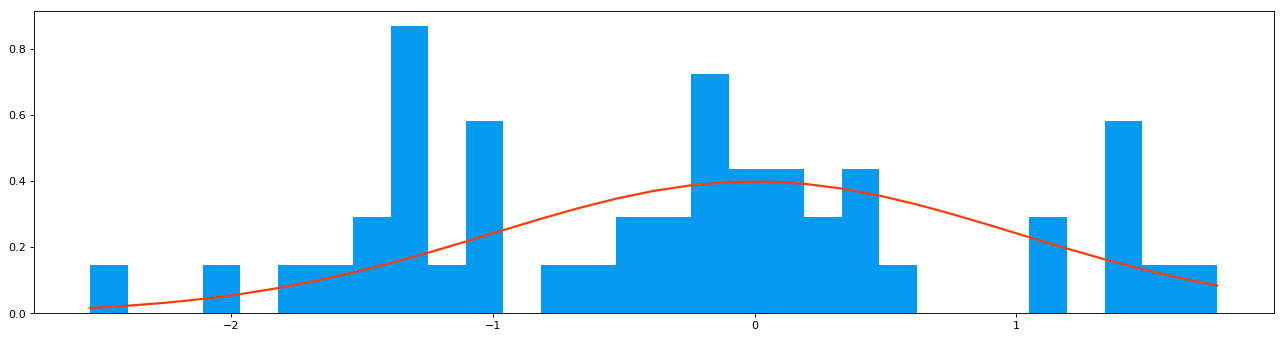

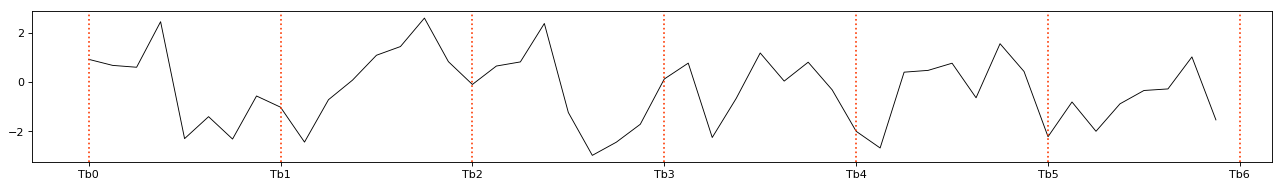

Wall time: 447 ms


In [42]:
%%time

display(HTML('<br><p>\
2. Construa uma função que implemente o receptor baseado no filtro adaptado. Este deve receber um código de linha com ruído e \
deve retornar uma sequência binária. Esta função deve ainda ter como parâmetro de entrada o valor de limiar de decisão (λ).</p>'
))

def generatingError(EncodedMessage, Sigma, Mean = 0):
    
    Error = random.normal(Mean, Sigma, len(EncodedMessage))
    #print(Error)

    plt.figure(figsize=(20, 5), dpi=80, facecolor='1')
    Count, Bins, Ignored = plt.hist(Error, 30, histtype='barstacked', color='xkcd:azure', normed=True)
    plt.plot(Bins, (1/(Sigma * sqrt(2 * pi)) * exp( - (Bins - Mean)**2 / (2 * Sigma**2) )), linewidth=2, color='xkcd:red orange')
    plt.show()
    
    MessageWithAWGN = Error + EncodedMessage.astype(float64)
    
    plt.figure(figsize=(20, 2.5), dpi=80, facecolor='1')
    plt.plot(MessageWithAWGN, linewidth='0.8', color='xkcd:black')
    plt.xticks(arange(0,len(MessageWithAWGN),Points))
    plt.xticks(
        [x for x in arange(0,len(MessageWithAWGN)+Points,Points)], 
        ['Tb%i'%x for x in arange(0,(len(MessageWithAWGN)/Points)+1,1)]
    )
    for VerticalLine in arange(0,len(MessageWithAWGN)+Points,Points): 
        plt.axvline(x=VerticalLine, color='xkcd:red orange', linestyle='dotted')
    plt.show()
    return MessageWithAWGN
    
    
StandardDeviation = Sigma = Lambda = DesvioPadrão = sqrt(1)
Mean = Média = Mu = 0 
# Distribuição normal padronizada - equivale à distribuição normal com mu = 0 e sigma = 1. 

MessageWithAWGN = generatingError(EncodedMessage, Lambda)
display(HTML("<p>" + str(MessageWithAWGN) + "</p>"))
display(HTML('<br>'))

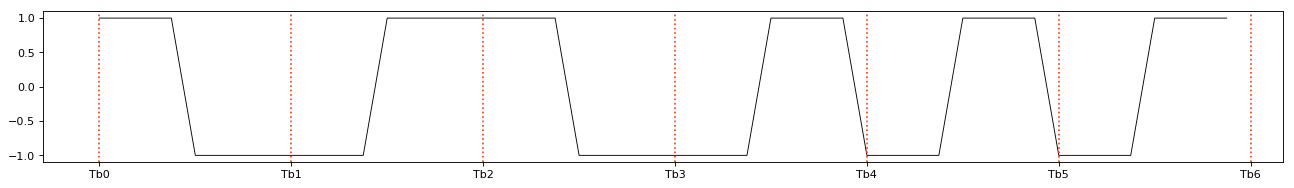

Wall time: 145 ms


In [50]:
%%time
%matplotlib inline
def adaptativeFilter(MessageWithAWGN):
    
    BaseVector = unitManchesterTemplate(([1]), Voltage, Points).astype(float64)
    Result = empty(len(MessageWithAWGN))
    
    for x in range(int(len(MessageWithAWGN)/Points)):
        if(dot(MessageWithAWGN[Points * x : Points * (x+1)], BaseVector)) >= 0 :
            Result[Points * x : Points * (x+1)] = unitManchesterTemplate(1, Voltage, Points)
        else:
            Result[Points * x : Points * (x+1)] = unitManchesterTemplate(0, Voltage, Points)
            
    Result = hstack(Result)

    plt.figure(figsize=(20, 2.5), dpi=80, facecolor='1')
    plt.plot(Result, linewidth='0.8', color='xkcd:black')
    
    plt.xticks(arange(0,len(Result),Points))
    plt.xticks(
        [x for x in arange(0,len(Result)+Points,Points)], 
        ['Tb%i'%x for x in arange(0,(len(Result)/Points)+1,1)]
    )
    for VerticalLine in arange(0,len(Result)+Points,Points): 
        plt.axvline(x=VerticalLine, color='xkcd:red orange', linestyle='dotted')
    plt.show()
    return Result


RecoveredMessage = adaptativeFilter(MessageWithAWGN)
display(HTML("<p>" + str(RecoveredMessage) + "</p>"))
display(HTML('<br>'))

Wall time: 135 ms


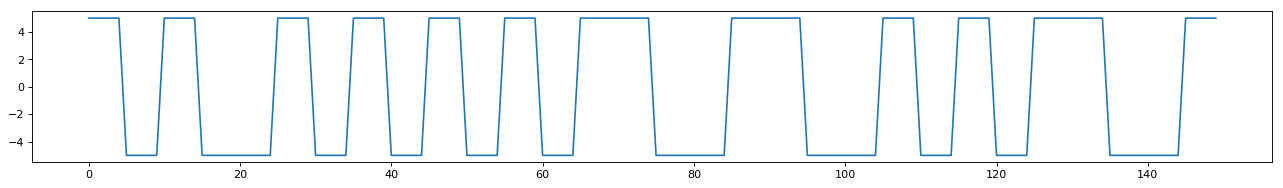

In [55]:
%%time

display(HTML('<br><p>\
3. Adapte as funções anteriores para funcionarem com o código de linha Manchester diferencial.'
))

def ManchesterTemplate(Value, Voltage, Points):
    Code = array([  int(Points/2) * ([-1*Voltage]), int(Points/2) * ([Voltage])  ])
    if Value == 0:
        return Code.flatten() * -1
    return Code.flatten()


def completeManchesterEncoding(OriginalMessageInBinary, Voltage, Points):
    
    result = []
    previous = 1
    for x in OriginalMessageInBinary:
        result.append(ManchesterTemplate((x ^ previous), Voltage, Points))
        previous = x ^ previous
    return hstack(result)

    Result = [1]
    Result = [ ManchesterTemplate((Binary ^ Result[-1]), Voltage, Points) for Binary in OriginalMessageInBinary ]
    return hstack(Result)
    return Result

Voltage = 5
Points = 10
EncodedMessage = completeManchesterEncoding([1,0,1,0,0,0,0,1,1,1,1,0,0,1,1], Voltage, Points)
CorrectSize = len(OriginalMessageInBinary) * Points
plt.figure(figsize=(20, 2.5), dpi=80, facecolor='1')
plt.plot(EncodedMessage)

display(HTML("<p>" + str(CorrectSize) + "</p>"))
display(HTML("<p>" + str(len([EncodedMessage])) + "</p>"))
display(HTML('<br>'))